In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
import warnings
import matplotlib.pyplot as plt



In [33]:
trainDF=pd.read_csv("/Users/tarakeswariramachandra/Documents/Michigan State University/CSE 802/archive/sign_mnist_train.csv")
testDF = pd.read_csv('/Users/tarakeswariramachandra/Documents/Michigan State University/CSE 802/archive/sign_mnist_test.csv')
Y_train = trainDF['label']
trainDF.drop(['label'], axis=1, inplace=True)
Y_test = testDF['label']
testDF.drop(['label'], axis=1, inplace=True)


In [34]:
size  = 28
channels = 1
batch = 128
epochs = 50


In [35]:
X_train = trainDF.values.reshape(trainDF.shape[0], size, size, channels)
X_test = testDF.values.reshape(testDF.shape[0], size, size, channels)



In [36]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenRescale = ImageDataGenerator(rescale=1./255)

X_train = datagen.flow(X_train, Y_train, batch_size=batch)

X_test = datagenRescale.flow(X_test, Y_test)


In [37]:
Model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                 
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                
                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                    
                    
                    Flatten(),
                    
                    Dense(units=4096, activation="relu"),                 
                    Dropout(0.2),
                    
                    Dense(units=1024, activation="relu"),
                    Dropout(0.2),
                                  
                    Dense(units=256, activation="relu"),
                    Dropout(0.2),
                    
                    Dense(units=25, activation="softmax"),
])


Model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])



In [38]:
checkpoint_filepath = 'best_model.hdf5'

callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)

callbacks = [callback_checkpoint, callback_learningrate]

In [39]:
history = Model.fit(X_train, validation_data=X_test, epochs=epochs, callbacks=callbacks)



Train for 215 steps, validate for 225 steps
Epoch 1/50
215/215 [==============================] - 88s 411ms/step - loss: 2.9802 - accuracy: 0.0857 - val_loss: 2.8157 - val_accuracy: 0.1053
Epoch 2/50
215/215 [==============================] - 96s 448ms/step - loss: 2.0998 - accuracy: 0.2918 - val_loss: 1.6792 - val_accuracy: 0.4049
Epoch 3/50
215/215 [==============================] - 97s 453ms/step - loss: 1.3017 - accuracy: 0.5428 - val_loss: 0.9107 - val_accuracy: 0.6790
Epoch 4/50
215/215 [==============================] - 97s 449ms/step - loss: 0.9041 - accuracy: 0.6822 - val_loss: 0.5700 - val_accuracy: 0.8035
Epoch 5/50
215/215 [==============================] - 169s 786ms/step - loss: 0.6722 - accuracy: 0.7641 - val_loss: 0.2823 - val_accuracy: 0.8984
Epoch 6/50
215/215 [==============================] - 109s 508ms/step - loss: 0.5478 - accuracy: 0.8118 - val_loss: 0.3420 - val_accuracy: 0.8762
Epoch 7/50
215/215 [==============================] - 120s 556ms/step - loss: 0.4623

215/215 [==============================] - 310s 1s/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.0187 - val_accuracy: 0.9948


In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
print("The accuracy of the model is \t:", acc[-1])



The accuracy of the model is 	: 0.98430157


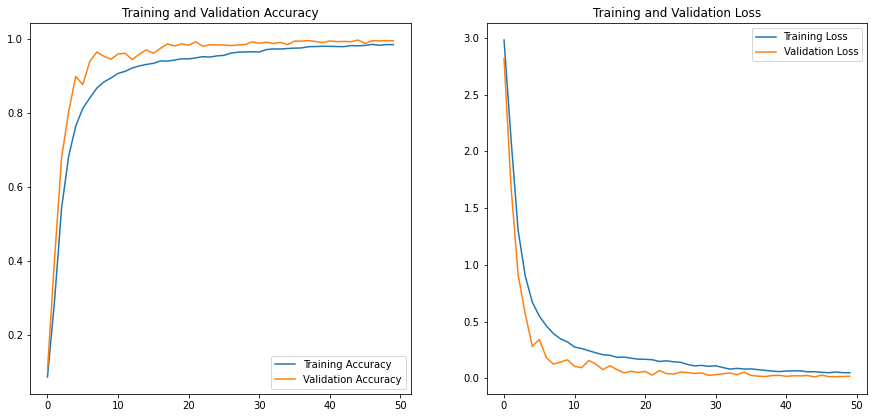

In [42]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [46]:
score = Model.evaluate(X_test) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])


225/225 [==============================] - 8s 37ms/step - loss: 0.0187 - accuracy: 0.9948
Test loss: 0.018691226294193054
Test accuracy: 0.99484104


In [ ]:
yHat = history.history.predict(X_test)
Yclasses = np.argmax(yHat,axis = 1)
Y_true = np.argmax(Y_test,axis = 1) 
confusion_matrix(Y_test, yHat)